In [22]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt

reader = easyocr.Reader(['en'], gpu = True)

In [12]:
def nothing(x):
    pass

#cap = cv2.VideoCapture(0)
# cv2.namedWindow("Trackbars")

# cv2.createTrackbar("L – H", "Trackbars", 0, 179, nothing)
# cv2.createTrackbar("L – S", "Trackbars", 0, 255, nothing)
# cv2.createTrackbar("L – V", "Trackbars", 0, 255, nothing)
# cv2.createTrackbar("U – H", "Trackbars", 179, 179, nothing)
# cv2.createTrackbar("U – S", "Trackbars", 255, 255, nothing)
# cv2.createTrackbar("U – V", "Trackbars", 255, 255, nothing)

# while True:
#_, frame = cap.read()
img = cv2.imread("image.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#     l_h = cv2.getTrackbarPos("L – H", "Trackbars")
#     l_s = cv2.getTrackbarPos("L – S", "Trackbars")
#     l_v = cv2.getTrackbarPos("L – V", "Trackbars")
#     u_h = cv2.getTrackbarPos("U – H", "Trackbars")
#     u_s = cv2.getTrackbarPos("U – S", "Trackbars")
#     u_v = cv2.getTrackbarPos("U – V", "Trackbars")

lower_blue = np.array([0, 0, 0])
upper_blue = np.array([179,255,204])
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# cv2.imshow("mask", mask)
result = reader.readtext(mask)
print(result[1])

# if result != None:
#     break

key = cv2.waitKey(1)

# if key == 27:
#     break
#result = cv2.bitwise_and(img, img, mask=mask)

#cv2.imshow("img", img)

cv2.destroyAllWindows()

([[419, 77], [629, 77], [629, 137], [419, 137]], 'Revision', 0.7219051902940774)


In [121]:
result[1][1]

'Revision'

In [122]:
first_result_top_x = result[0][0][0][1]
first_topic_name = result[0][1]

# Get the topic by getting the first line comparing to the first word in the first line

In [126]:
for i in range(len(result)-1):
    i += 1
    if abs(first_result_top_x - result[i][0][0][1]) in range(0,20):
        name = first_topic_name + " " + result[i][1]
    

In [127]:
name

'First Lesson Revision'

# Drawing bounding box around the word

In [55]:
top_left = tuple(result[0][0][1])
bottom_right = tuple(result[1][0][2])
text = result[0][1] + " " + result[1][1]
font = cv2.FONT_HERSHEY_SIMPLEX

In [58]:
result[0][0]

[[94, 81], [380, 81], [380, 135], [94, 135]]

In [73]:
result[3]

([[506, 294], [610, 294], [610, 318], [506, 318]],
 'Activation',
 0.9992524901789319)

In [74]:
lt = result[3][0][1][0]
lb = result[3][0][0][0]

lt - lb

104

In [68]:
lt = result[0][0][1][0]
lb = result[0][0][0][0]

lt - lb

286

In [67]:
lt = result[1][0][1][0]
lb = result[1][0][0][0]

lt - lb

210

In [32]:
text

'First Lesson Revision'

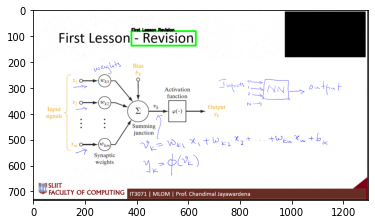

In [56]:
img = cv2.imread("image.jpg")
img = cv2.rectangle(img, top_left, bottom_right, (0,255,0), 5)
img = cv2.putText(img, text, top_left, font, .5, (0,0,0), 2, cv2.LINE_AA)
plt.imshow(img)
plt.show()